In [30]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.stats.multitest as smm

In [2]:
data = pd.read_csv('ab_browser_test.csv')

In [3]:
data.head()

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [4]:
exp_clicks = data[data['slot'] == 'exp'].groupby(['userID', 'browser'])['n_clicks'].apply(pd.Series)
control_clicks = data[data['slot'] == 'control'].groupby(['userID', 'browser'])['n_clicks'].apply(pd.Series)

In [5]:
exp_clicks.values

array([23,  3, 29, ...,  4,  4,  3], dtype=int64)

In [6]:
ans1 = (
    exp_clicks.sum()/
    control_clicks.sum() - 1
) * 100

In [7]:
ans1

1.6135689824415822

In [9]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [10]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [19]:
np.random.seed(0)
print("difference between medians:", np.median(exp_clicks) - np.median(control_clicks))
exp_median = list(map(np.median, get_bootstrap_samples(exp_clicks.values, 500)))
control_median = list(map(np.median, get_bootstrap_samples(control_clicks.values, 500)))
delta_median = list(map(lambda x: x[0] - x[1], zip(exp_median, control_median)))
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median, 0.05))

difference between medians: 1.0
95% confidence interval for the difference between medians [1. 1.]


In [20]:
np.random.seed(0)
print("difference between means:", np.mean(exp_clicks) - np.mean(control_clicks))
exp_mean = list(map(np.mean, get_bootstrap_samples(exp_clicks.values, 500)))
control_mean = list(map(np.mean, get_bootstrap_samples(control_clicks.values, 500)))
control_var = list(map(np.var, get_bootstrap_samples(control_clicks.values, 500)))
delta_mean = list(map(lambda x: x[0] - x[1], zip(exp_mean, control_mean)))
print("95% confidence interval for the difference between means",  stat_intervals(delta_mean, 0.05))

difference between means: 0.3030947340656329
95% confidence interval for the difference between means [0.19960335 0.40496719]


((array([-2.99209858e+00, -2.71015927e+00, -2.55162541e+00, -2.43921385e+00,
         -2.35113311e+00, -2.27822091e+00, -2.21572267e+00, -2.16084152e+00,
         -2.11178767e+00, -2.06734403e+00, -2.02664403e+00, -1.98904794e+00,
         -1.95406954e+00, -1.92133033e+00, -1.89052965e+00, -1.86142459e+00,
         -1.83381593e+00, -1.80753820e+00, -1.78245240e+00, -1.75844061e+00,
         -1.73540186e+00, -1.71324904e+00, -1.69190643e+00, -1.67130780e+00,
         -1.65139483e+00, -1.63211595e+00, -1.61342528e+00, -1.59528183e+00,
         -1.57764883e+00, -1.56049314e+00, -1.54378481e+00, -1.52749667e+00,
         -1.51160399e+00, -1.49608418e+00, -1.48091659e+00, -1.46608224e+00,
         -1.45156367e+00, -1.43734479e+00, -1.42341071e+00, -1.40974764e+00,
         -1.39634279e+00, -1.38318426e+00, -1.37026095e+00, -1.35756253e+00,
         -1.34507932e+00, -1.33280226e+00, -1.32072287e+00, -1.30883317e+00,
         -1.29712567e+00, -1.28559331e+00, -1.27422944e+00, -1.26302778e+00,

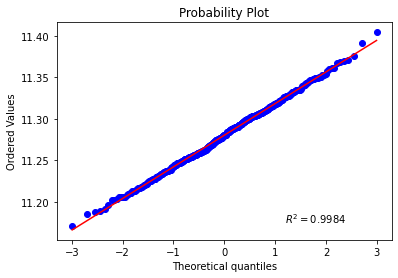

In [24]:
stats.probplot(control_mean, plot=plt, rvalue=True)

((array([409.75447609, 417.6076492 , 422.06789456, 425.24996033,
         427.75458277, 429.83540071, 431.6244473 , 433.19958802,
         434.61075771, 435.89197548, 437.06750372, 438.15527962,
         439.16895419, 440.11916758, 441.0143809 , 441.86143812,
         442.66595697, 443.43260794, 444.16531782, 444.86742108,
         445.54177438, 446.19084464, 446.81677748, 447.42145127,
         448.00652022, 448.57344901, 449.12354099, 449.6579613 ,
         450.17775596, 450.68386771, 451.17714938, 451.65837504,
         452.12824958, 452.58741674, 453.03646615, 453.47593922,
         453.90633437, 454.32811152, 454.74169597, 455.14748186,
         455.54583518, 455.93709642, 456.3215829 , 456.69959087,
         457.07139736, 457.43726183, 457.79742761, 458.1521233 ,
         458.50156388, 458.84595184, 459.1854781 , 459.52032292,
         459.85065667, 460.17664058, 460.49842735, 460.81616179,
         461.12998133, 461.44001656, 461.74639164, 462.04922476,
         462.3486285 , 46

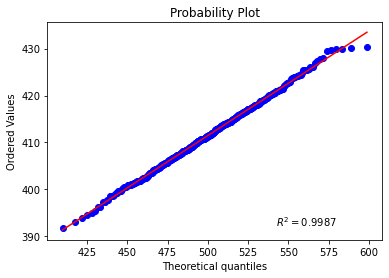

In [27]:
stats.probplot(control_var, dist="chi2", 
               sparams=(len(control_var)-1), plot=plt, rvalue=True)

In [28]:
stats.mannwhitneyu(exp_clicks, control_clicks, alternative='two-sided')

MannwhitneyuResult(statistic=41184125116.0, pvalue=6.247235801369629e-75)

In [50]:
exp_browser_clicks = data[data['slot'] == 'exp'].groupby(['browser', 'userID']).sum()['n_clicks']
control_browser_clicks = data[data['slot'] == 'control'].groupby(['browser', 'userID']).sum()['n_clicks']

In [37]:
exp_browser_clicks['Browser #2'].values

array([23,  7, 39, ...,  4,  4,  3], dtype=int64)

In [41]:
p_values = []
for browser in data['browser'].unique():
    pval = stats.mannwhitneyu(exp_browser_clicks[browser].values,
                              control_browser_clicks[browser].values, 
                              alternative='two-sided')[1]
    p_values.append(pval)

In [55]:
reject, mann_witney_, _, _ = smm.multipletests(p_values, alpha=0.05, method='holm')

In [43]:
mann_witney_

array([0.2724386 , 1.        , 0.        , 0.29920481, 1.        ,
       1.        ])

In [57]:
reject

array([False, False,  True, False, False, False])

In [51]:
exp_browser_non_clicks = data[data['slot'] == 'exp'].groupby(['browser', 'userID']).sum()['n_nonclk_queries']
control_browser_non_clicks = data[data['slot'] == 'control'].groupby(['browser', 'userID']).sum()['n_nonclk_queries']

In [52]:
ratios_exp = []
ratios_control = []
for browser in data['browser'].unique():
    r_e = (exp_browser_non_clicks[browser].values.sum()/
           exp_browser_clicks[browser].values.sum()) * 100
    r_c = (control_browser_non_clicks[browser].values.sum()/
           control_browser_clicks[browser].values.sum()) * 100
    ratios_exp.append(r_e)
    ratios_control.append(r_c)

In [62]:
for i in range(len(ratios_exp)):
    print(ratios_control[i], ratios_exp[i])

45.9850803231301 44.01179056219414
46.81100531287727 43.107663397844185
77.81343344802127 41.980472304078006
28.431909182250347 29.146966595940437
34.771599445765105 32.70343888321416
35.85660540343938 34.49268982351694


In [54]:
ratios_control

[45.9850803231301,
 46.81100531287727,
 77.81343344802127,
 28.431909182250347,
 34.771599445765105,
 35.85660540343938]